<a href="https://colab.research.google.com/github/alifnadhifah/Tubes_Machine_Learning/blob/main/Tugas_Besar_Pembelajaran_Mesin_Tahap_1_1301184255.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<pre>
Nama : Alif Ranadian Nadhifah
NIM  : 1301184255
</pre>


# Dataset


In [1]:
# library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random, math
import seaborn as sns

In [2]:
# tampilkan dataset
df = pd.read_csv("https://raw.githubusercontent.com/alifnadhifah/Tubes_Machine_Learning/main/kendaraan_train.csv")
df_kendaraan = df.copy()
df_kendaraan.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


# Pre-Processing Data

In [3]:
df_kendaraan.drop_duplicates()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [4]:
# Melihat informasi tipe data dan jumlah data non-null untuk mengecek ada atau tidaknya data null dalam masing-masing kolom
df_kendaraan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [5]:
encode_dfk = {"Jenis_Kelamin": {"Wanita": 0, "Pria": 1},
              "Umur_Kendaraan": {"< 1 Tahun":0 , "1-2 Tahun":1, "> 2 Tahun":2},
              "Kendaraan_Rusak": {"Tidak":0, "Pernah":1}}
df_kendaraan.replace(encode_dfk, inplace=True)

In [6]:
df_kendaraan.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,2,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,4,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
4,5,1.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0,0


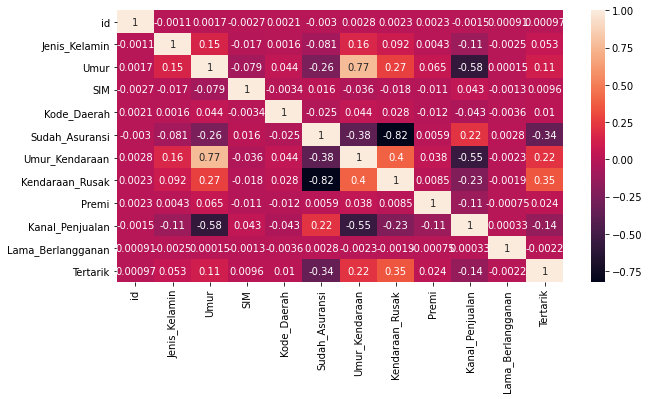

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(df_kendaraan[['id', 'Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi',
                          'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan',
                          'Lama_Berlangganan', 'Tertarik']].corr(),annot=True)

## Seleksi Kolom Data

Menentukan data kolom yang akan dipakai. Karena ada data kolom yang berpengaruh dan tidak pada hasil yang diinginkan.

In [8]:
df_kendaraan.columns

Index(['id', 'Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi',
       'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan',
       'Lama_Berlangganan', 'Tertarik'],
      dtype='object')

In [9]:
#df2 = df_kendaraan.copy()

In [10]:
cols = ['Umur','Umur_Kendaraan', 'Kendaraan_Rusak']
df_kendaraan = df_kendaraan[cols]

df_kendaraan.head()

,Umur,Umur_Kendaraan,Kendaraan_Rusak
0,30.0,0.0,0.0
1,48.0,2.0,1.0
2,21.0,0.0,0.0
3,58.0,1.0,0.0
4,50.0,2.0,NaN


## Menangani Data Missing Value 

Data Missing Value akan diisi oleh Nilai Modus dalam setiap kolom. Hal ini melihat bahwa data bervariasi berupa data kategorik dan numerik. Yang mana data kategorik akan sulit untuk diisi dengan nilai median ataupun nilai rata-rata.

In [11]:
df_kendaraan["Umur"] = df_kendaraan["Umur"].fillna(df_kendaraan["Umur"].mode()[0])
df_kendaraan["Umur_Kendaraan"] = df_kendaraan["Umur_Kendaraan"].fillna(df_kendaraan["Umur_Kendaraan"].mode()[0])
df_kendaraan["Kendaraan_Rusak"] = df_kendaraan["Kendaraan_Rusak"].fillna(df_kendaraan["Kendaraan_Rusak"].mode()[0])

# Cek kembali apakah masih terdapat data null/tidak
df_kendaraan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Umur             285831 non-null  float64
 1   Umur_Kendaraan   285831 non-null  float64
 2   Kendaraan_Rusak  285831 non-null  float64
dtypes: float64(3)
memory usage: 6.5 MB


# Clustering

Model Clustering merupakan kategori Machine Learning Unsupervised Learning. Model Clustering dipilih karena dataset yang telah diseleksi dan diolah sebelum diproses tidak memiliki label ('Tertarik').

## Inisialisasi

In [12]:
# Ambil score 2 data yang memiliki keterkaitan erat tertinggi untuk dimodelkan
X = df_kendaraan.iloc[:, [1, 2]].values

In [13]:
m=X.shape[0] #Train Set
n=X.shape[1] #Validation set
n_iter=5 #Jumlah Iterasi
K=2 #Jumlah Kluster

## Buat Nilai Centroid

In [14]:
import numpy as np
Centroids=np.array([]).reshape(n,0)

In [15]:
import random
for i in range(K):
    rand = random.randint(0,m-1)
    Centroids = np.c_[Centroids,X[rand]]

In [16]:
# Inisialisasi Hasil keluaran ke dalam bentuk dictionary
Output={}

### Hitung Jarak Nilai Euclid

Menghitung jarak euclidean dari setiap titik ke titik centroid

In [17]:
euclid=np.array([]).reshape(m,0)
for k in range(K):
    tempDist = np.sum((X-Centroids[:,k])**2,axis=1)
    euclid = np.c_[euclid,tempDist]
#Mencari jarak minimum dari setiap baris matriks dan menyimpan indeks kolom dalam vektor Z
Z = np.argmin(euclid,axis=1)+1 

Mengelompokkan kembali titik data berdasarkan indeks cluster Z dan menyimpannya dalam kamus Output dan juga menghitung mean dari cluster yang terpisah dan menetapkannya sebagai centroid baru

## Pemodelan

In [18]:
Y={} # Kamus sementara untuk menyimpan solusi dari 1 iterasi
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for M in range(m):
    Y[Z[M]]=np.c_[Y[Z[M]],X[M]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

Ulangi langkah sebelumnya hingga sebanyak jumlah iterasi n_iter kali

In [19]:
for i in range(n_iter):
    euclid=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist = np.sum((X-Centroids[:,k])**2,axis=1)
        euclid = np.c_[euclid,tempDist]
        Z=np.argmin(euclid,axis=1)+1
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for M in range(m):
        Y[Z[M]]=np.c_[Y[Z[M]],X[M]]
     
    for k in range(K):
        Y[k+1]=Y[k+1].T
    
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)

    Output=Y

## Plot Cluster Data

Plot Data Sebelum Klasterisasi

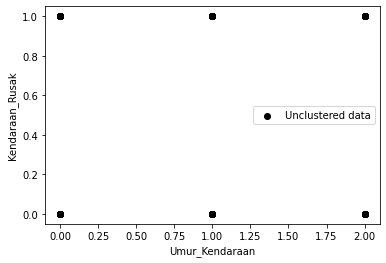

In [20]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c='black',label='Unclustered data')
plt.xlabel('Umur_Kendaraan')
plt.ylabel('Kendaraan_Rusak')
plt.legend()
plt.show()

Plot Data Setelah Klasterisasi

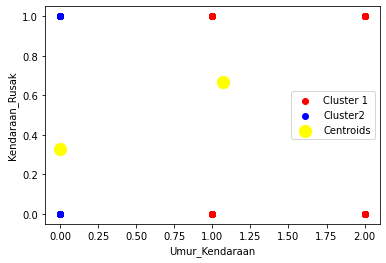

In [21]:
color=['red','blue']
labels=['Cluster 1','Cluster2']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=150,c='yellow',label='Centroids')
plt.xlabel('Umur_Kendaraan')
plt.ylabel('Kendaraan_Rusak')
plt.legend()
plt.show()

# Export Dataset

In [22]:
data = df_kendaraan.to_csv('dataset_after_process.csv')